In [15]:
import h5py
file = "file1001763.h5"
filename = "/vol/datasets/cil/2021_11_23_fastMRI_data/knee/unzipped/singlecoil_val/" + file
hf = h5py.File(filename)
slice = hf['kspace'][()][20]
print(hf.keys())

<KeysViewHDF5 ['ismrmrd_header', 'kspace', 'reconstruction_esc', 'reconstruction_rss']>


In [5]:
import matplotlib.pyplot as plt

def show_coils(data, cmap=None):
    fig = plt.figure()
    plt.imshow(data, cmap=cmap)


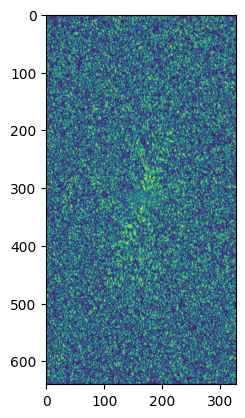

In [19]:
import numpy as np
import matplotlib.pyplot as plt

slice = np.load("8955.npy")
slice = slice[:,20:-20]
plt.imshow(np.log(abs(slice) + 1e-9))
plt.show()


tensor(-13.3731) tensor(3.5231)


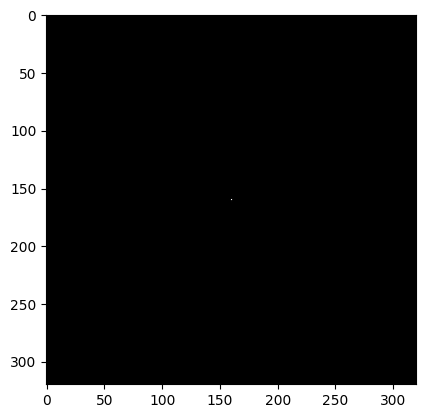

In [18]:
import fastmri
from fastmri.data.transforms import VarNetDataTransform
from fastmri.data import transforms as T

slice_kspace2 = T.to_tensor(slice)      # Convert from numpy array to pytorch tensor
print(slice_kspace2.min(), slice_kspace2.max())
slice_image = fastmri.ifft2c(slice_kspace2)           # Apply Inverse Fourier Transform to get the complex image
slice_image_abs = fastmri.complex_abs(slice_image) 
slice_image_abs = T.center_crop(slice_image_abs, (320,320))
show_coils(slice_image_abs, cmap="gray")